# Training the model


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


In [41]:
df = pd.read_csv('housing.csv', sep='\s+',names=['crime_rate', 'zoned_land', 'industry', 'charles_dummy_var', 'nox_conc', 'rooms', 'age', 'distance', 'highways', 'property_tax', 'pt_ratio', 'black_prop', 'lower_status_popu', 'price_in_thousands'])
df.head()

,crime_rate,zoned_land,industry,charles_dummy_var,nox_conc,rooms,age,distance,highways,property_tax,pt_ratio,black_prop,lower_status_popu,price_in_thousands
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
X = df.drop('price_in_thousands', axis=1)
X.head()

,crime_rate,zoned_land,industry,charles_dummy_var,nox_conc,rooms,age,distance,highways,property_tax,pt_ratio,black_prop,lower_status_popu
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [43]:
y = df['price_in_thousands']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price_in_thousands, dtype: float64

In [44]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('Standard Scaling', numeric_transformer, num_features)
    ]
)

In [45]:
X = preprocessor.fit_transform(X)

In [46]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [48]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)

    return mae, rmse, r2

In [49]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor()
}
# Here catboost parameter verbose=0 is used to suppress the output of the model training process.

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    model_results[name] = test_r2

    print (f'{name} Training \n MAE: {train_mae:.2f} RMSE: {train_rmse:.2f} R2: {train_r2:.2f}')
    print (f'{name} Testing \n MAE: {test_mae:.2f} RMSE: {test_rmse:.2f} R2: {test_r2:.2f}')
    print ('-'*50)
    print('\n')

print(model_results)

Linear Regression Training 
 MAE: 3.31 RMSE: 4.65 R2: 0.75
Linear Regression Testing 
 MAE: 3.19 RMSE: 4.93 R2: 0.67
--------------------------------------------------


Lasso Training 
 MAE: 3.68 RMSE: 5.28 R2: 0.68
Lasso Testing 
 MAE: 3.46 RMSE: 5.25 R2: 0.62
--------------------------------------------------


Ridge Training 
 MAE: 3.31 RMSE: 4.65 R2: 0.75
Ridge Testing 
 MAE: 3.19 RMSE: 4.93 R2: 0.67
--------------------------------------------------




Random Forest Training 
 MAE: 0.90 RMSE: 1.46 R2: 0.98
Random Forest Testing 
 MAE: 2.11 RMSE: 2.94 R2: 0.88
--------------------------------------------------


AdaBoost Training 
 MAE: 2.35 RMSE: 2.87 R2: 0.91
AdaBoost Testing 
 MAE: 2.49 RMSE: 3.91 R2: 0.79
--------------------------------------------------


KNeighbors Training 
 MAE: 2.35 RMSE: 3.62 R2: 0.85
KNeighbors Testing 
 MAE: 2.61 RMSE: 4.55 R2: 0.72
--------------------------------------------------


Decision Tree Training 
 MAE: 0.00 RMSE: 0.00 R2: 1.00
Decision Tree Testing 
 MAE: 2.77 RMSE: 4.78 R2: 0.69
--------------------------------------------------


SVR Training 
 MAE: 2.99 RMSE: 5.24 R2: 0.68
SVR Testing 
 MAE: 2.73 RMSE: 5.07 R2: 0.65
--------------------------------------------------


CatBoost Training 
 MAE: 0.41 RMSE: 0.52 R2: 1.00
CatBoost Testing 
 MAE: 1.85 RMSE: 2.92 R2: 0.88
--------------------------------------------------


XGBoost Training 
 MAE: 0.01 RMSE: 0.02 R2: 1.00
XGBoost Testing 
 MAE: 1.

In [50]:
pd.DataFrame(model_results.items(), columns=['Model', 'r2_score']).sort_values(by='r2_score', ascending=False)

,Model,r2_score
9,XGBoost,0.905784
8,CatBoost,0.883538
3,Random Forest,0.881786
4,AdaBoost,0.792020
5,KNeighbors,0.718311
6,Decision Tree,0.687931
0,Linear Regression,0.668759
2,Ridge,0.668440
7,SVR,0.649643
1,Lasso,0.624288


In [52]:
# # XGBoost 
# xgmodel = XGBRegressor()
# xgmodel.fit(X_train, y_train)
# y_pred = xgmodel.predict(X_test)
# score= r2_score(y_test, y_pred)
# print(f'XGBoost R2: {r2_score:.2f}')

from sklearn.metrics import r2_score

# XGBoost 
xgmodel = XGBRegressor()
xgmodel.fit(X_train, y_train)
y_pred = xgmodel.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'XGBoost R2: {r2:.2f}')

XGBoost R2: 0.91


Text(0, 0.5, 'Predicted Price')

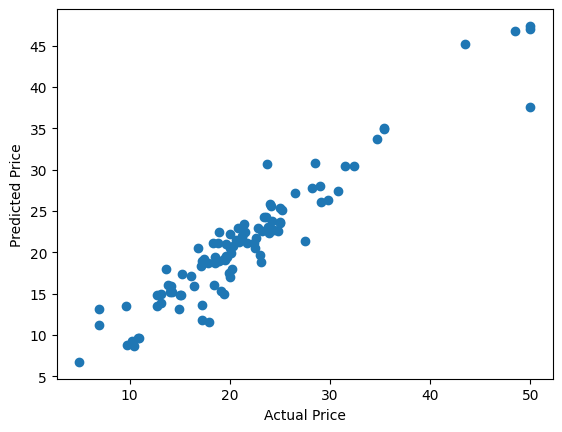

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

(<Axes: xlabel='Actual Price', ylabel='Predicted Price'>,
 Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'))

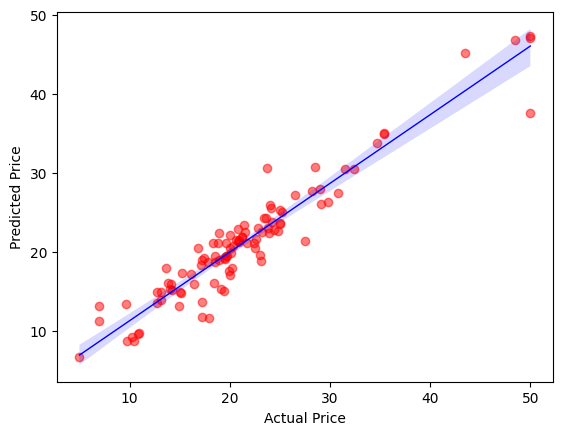

In [61]:
sns.regplot(x = y_test,y =  y_pred, scatter_kws={'alpha':0.5, 'color':'red'}, line_kws= {'color':'b', 'linewidth':1}), plt.xlabel('Actual Price'), plt.ylabel('Predicted Price')

<Axes: xlabel='price_in_thousands'>

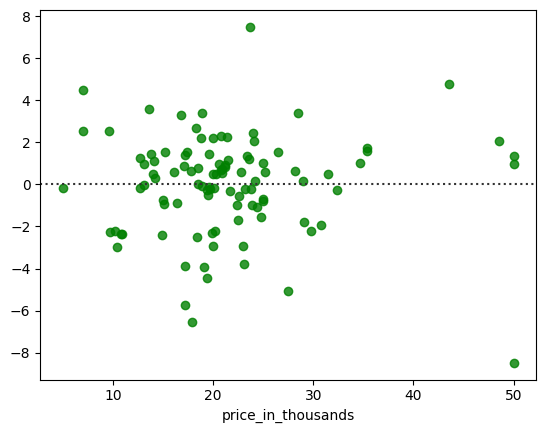

In [65]:
sns.residplot(x = y_test, y = y_pred, color="g")

In [66]:
pred_df = pd.DataFrame({'True Values':y_test, 'Predictions':y_pred, 'Residuals':y_test-y_pred}).sort_values(by='Residuals', ascending=False)
pred_df

,True Values,Predictions,Residuals
371,50.0,37.574116,12.425884
412,17.9,11.571929,6.328071
365,27.5,21.414000,6.086000
408,17.2,11.787285,5.412715
153,19.4,14.965280,4.434720
...,...,...,...
436,9.6,13.430772,-3.830772
414,7.0,11.203732,-4.203732
491,13.6,17.959005,-4.359005
489,7.0,13.117878,-6.117878
